# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[28,  6, 86, ..., 63, 81, 23],
       [82, 18, 50, ..., 89, 38, 49],
       [55, 28, 33, ..., 80, 29, 72],
       ...,
       [17, 32, 21, ..., 88, 50, 34],
       [90, 32, 93, ..., 31, 66, 15],
       [33, 92,  4, ..., 68, 35,  5]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
A1 = A.copy()
np.random.shuffle(A1.T)
A1,A1.shape

(array([[34,  2, 35, ..., 63, 57,  8],
        [76, 17, 66, ..., 89, 85, 59],
        [72, 47, 86, ..., 80, 44, 75],
        ...,
        [77,  2, 30, ..., 88,  5, 79],
        [20, 96, 60, ..., 31, 48, 28],
        [55, 67, 45, ..., 68, 51, 51]]),
 (200, 50))

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [3]:
A[A[:,0::2].sum(axis = 1) > A[:,1::2].sum(axis = 1).mean()]

array([[82, 18, 50, ..., 89, 38, 49],
       [55, 28, 33, ..., 80, 29, 72],
       [65, 90, 84, ..., 79, 25, 81],
       ...,
       [57,  8, 49, ..., 27, 27, 18],
       [90, 32, 93, ..., 31, 66, 15],
       [33, 92,  4, ..., 68, 35,  5]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [4]:
np.argmax(np.max(A, axis = 1) - np.min(A, axis = 1))

1

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [5]:
np.argsort(np.argsort(np.ravel(A))).reshape(A.shape) + 1

array([[2887,  719, 8674, ..., 6306, 8145, 2348],
       [8291, 1854, 5042, ..., 8965, 3897, 5001],
       [5595, 2892, 3316, ..., 8090, 2973, 7233],
       ...,
       [1705, 3287, 2153, ..., 8814, 5105, 3463],
       [9101, 3225, 9348, ..., 3204, 6604, 1580],
       [3345, 9241,  508, ..., 6820, 3573,  608]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [6]:
(A-np.min(A, axis = 1).reshape(200,1))/((np.max(A, axis = 1)-np.min(A, axis = 1))).reshape(200,1)

array([[0.27083333, 0.04166667, 0.875     , ..., 0.63541667, 0.82291667,
        0.21875   ],
       [0.82828283, 0.18181818, 0.50505051, ..., 0.8989899 , 0.38383838,
        0.49494949],
       [0.55670103, 0.27835052, 0.32989691, ..., 0.81443299, 0.28865979,
        0.73195876],
       ...,
       [0.15789474, 0.31578947, 0.2       , ..., 0.90526316, 0.50526316,
        0.33684211],
       [0.90909091, 0.32323232, 0.93939394, ..., 0.31313131, 0.66666667,
        0.15151515],
       [0.33333333, 0.92929293, 0.04040404, ..., 0.68686869, 0.35353535,
        0.05050505]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [7]:
np.tile(A,(10,1)).reshape(10,*A.shape)*np.arange(1,11).reshape(10,1,1)

array([[[ 28,   6,  86, ...,  63,  81,  23],
        [ 82,  18,  50, ...,  89,  38,  49],
        [ 55,  28,  33, ...,  80,  29,  72],
        ...,
        [ 17,  32,  21, ...,  88,  50,  34],
        [ 90,  32,  93, ...,  31,  66,  15],
        [ 33,  92,   4, ...,  68,  35,   5]],

       [[ 56,  12, 172, ..., 126, 162,  46],
        [164,  36, 100, ..., 178,  76,  98],
        [110,  56,  66, ..., 160,  58, 144],
        ...,
        [ 34,  64,  42, ..., 176, 100,  68],
        [180,  64, 186, ...,  62, 132,  30],
        [ 66, 184,   8, ..., 136,  70,  10]],

       [[ 84,  18, 258, ..., 189, 243,  69],
        [246,  54, 150, ..., 267, 114, 147],
        [165,  84,  99, ..., 240,  87, 216],
        ...,
        [ 51,  96,  63, ..., 264, 150, 102],
        [270,  96, 279, ...,  93, 198,  45],
        [ 99, 276,  12, ..., 204, 105,  15]],

       ...,

       [[224,  48, 688, ..., 504, 648, 184],
        [656, 144, 400, ..., 712, 304, 392],
        [440, 224, 264, ..., 640, 232, 576

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [8]:
np.concatenate((A[:,0::2], A[:,1::2]), axis = 1)

array([[28, 86, 53, ..., 48, 63, 23],
       [82, 50, 54, ..., 86, 89, 49],
       [55, 33, 71, ..., 71, 80, 72],
       ...,
       [17, 21, 39, ..., 87, 88, 34],
       [90, 93, 82, ..., 33, 31, 15],
       [33,  4, 53, ..., 15, 68,  5]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [9]:
np.all(A>5, axis = 1).sum()

13

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [10]:
np.array(np.split(A,10)).mean(axis = 0)

array([[35.2, 39.4, 50.4, 52.3, 50.4, 50. , 50.2, 54.7, 43.6, 56.2, 50. ,
        40.6, 60.5, 48.1, 48.5, 33.2, 57.4, 48.6, 34. , 44.3, 42.4, 35.5,
        46. , 27.7, 39.7, 64.7, 50.3, 56.6, 40.7, 41.8, 43.2, 49.5, 43.8,
        55.7, 46.7, 52.8, 41.8, 57. , 31.3, 53.8, 49.8, 58.1, 25.1, 43.7,
        46. , 54.2, 45. , 52. , 37.1, 56.8],
       [50.1, 33.8, 39.3, 45.4, 55.7, 68.8, 40.6, 57. , 52.4, 49.4, 39.2,
        52.7, 48.9, 52.5, 48.7, 39. , 37.1, 42.5, 51.3, 46.4, 41.4, 30.9,
        40.7, 54.9, 56.5, 51.2, 55.2, 58.5, 60.1, 38.8, 53.1, 40.7, 49.3,
        34. , 51.5, 40.9, 55.3, 39. , 36.2, 52.7, 39.2, 45.8, 57.6, 66.1,
        53.8, 46.2, 61.2, 41.3, 44.6, 44.4],
       [35.4, 37.9, 51.9, 42.3, 57.8, 40.1, 56. , 44.2, 54.7, 45.8, 69.2,
        56. , 42.5, 58.5, 49.7, 49.7, 37.3, 51.9, 46.3, 38.9, 47.7, 33.5,
        57.8, 34.4, 40.8, 49.9, 52.1, 55.6, 55.1, 46.5, 55.2, 57.3, 63.9,
        34.7, 30. , 55.2, 60.3, 49.2, 49.2, 40.9, 60.4, 46.1, 39.5, 62.5,
        62.1, 55.8, 51

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [11]:
A.ravel()[np.sort(np.unique(A,return_index = True)[1])]

array([28,  6, 86, 64, 53, 47, 39, 98,  8, 38, 42, 85,  2, 36, 65, 90, 60,
       22, 79, 27, 35, 32, 57, 31, 69, 62, 26, 48, 34, 41, 14, 58, 24, 61,
       93, 63, 81, 23, 82, 18, 50, 80, 54, 96,  5, 70, 59, 30, 55, 56, 45,
       84, 99, 74, 33, 66, 17, 21,  1,  4, 76,  0, 51, 89, 49, 71, 78, 75,
       19, 46, 92, 88, 44, 72, 37, 12, 67, 29, 87, 97,  9,  7, 95, 52, 73,
       13, 68, 16, 83, 40, 20, 91, 11,  3, 43, 25, 94, 15, 10, 77])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [12]:
np.sqrt(np.power((A-A.mean(axis = 0)),2).sum(axis = 1)).reshape(200,1)

array([[166.20426251],
       [204.75538302],
       [188.07949616],
       [216.84904167],
       [199.45931133],
       [207.14006584],
       [206.40328698],
       [203.67880811],
       [216.40572283],
       [232.03393475],
       [204.99640698],
       [200.07057973],
       [214.19569761],
       [187.215616  ],
       [212.32603909],
       [201.18334145],
       [209.45447447],
       [199.6915293 ],
       [204.71821334],
       [224.14760065],
       [202.67090782],
       [188.60927038],
       [190.25253448],
       [209.61349402],
       [192.60079666],
       [190.28556665],
       [209.33023402],
       [213.840494  ],
       [218.15039967],
       [200.5492131 ],
       [182.7098434 ],
       [213.5715966 ],
       [206.85204102],
       [179.93825851],
       [214.46693655],
       [215.52818116],
       [227.21471536],
       [209.07749012],
       [205.53959929],
       [213.55935211],
       [220.88620798],
       [208.32020275],
       [186.16840998],
       [214

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [13]:
np.where(A>50, A*2, A*3)

array([[ 84,  18, 172, ..., 126, 162,  69],
       [164,  54, 150, ..., 178, 114, 147],
       [110,  84,  99, ..., 160,  87, 144],
       ...,
       [ 51,  96,  63, ..., 176, 150, 102],
       [180,  96, 186, ...,  93, 132,  45],
       [ 99, 184,  12, ..., 136, 105,  15]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [14]:
convolve3 = np.convolve(np.array(A).ravel(),np.ones(3))/3
convolve5 = np.convolve(np.array(A).ravel(),np.ones(5))/5
convolve10 = np.convolve(np.array(A).ravel(),np.ones(10))/10

max_len = max(len(convolve3), len(convolve5), len(convolve10))
convolve3 = np.pad(convolve3, (0, max_len - len(convolve3)), mode='constant', constant_values=0)
convolve5 = np.pad(convolve5, (0, max_len - len(convolve5)), mode='constant', constant_values=0)
convolve10 = np.pad(convolve10, (0, max_len - len(convolve10)), mode='constant', constant_values=0)
convolve3 + convolve5 + convolve10

array([17.73333333, 21.53333333, 76.        , ..., 10.8       ,
        4.        ,  0.5       ])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 23
         Function evaluations: 46


Text(0.5, 1.0, 'fd')

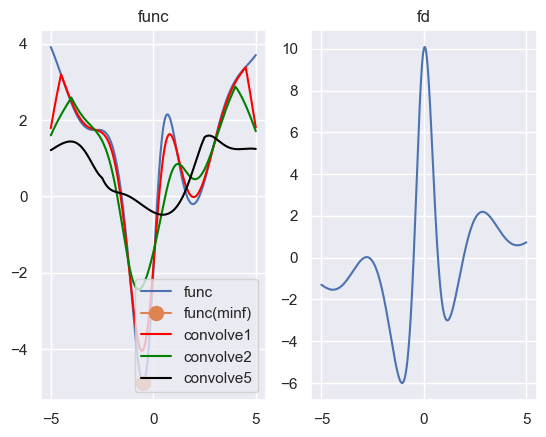

In [15]:
from scipy import optimize

def func(x:np.ndarray)->np.ndarray:
    return((5*np.sin(2*x)-np.power(np.cos(x),2)-1+np.abs(np.power(x,3))-np.power(x,2))/(np.power(x,2)+1))

d = 0.0001
step = 0.01
x = np.linspace(-5,5,1000)
fd = ((func(x + d) - func(x))/d)
minf = optimize.fmin(func, 0)
convolve1 = np.convolve(func(x),np.ones(np.int64(1/step)), mode='same')/(1/step)
convolve2 = np.convolve(func(x),np.ones(np.int64(2/step)), mode='same')/(2/step)
convolve5 = np.convolve(func(x),np.ones(np.int64(5/step)), mode='same')/(5/step)

plt.subplot(1,2,1)
plt.plot(x,func(x))
plt.plot(minf,func(minf),marker = "o", markersize=10)
plt.plot(x, convolve1, color = 'red')
plt.plot(x, convolve2, color = 'green')
plt.plot(x, convolve5, color = 'black')
plt.legend(['func', 'func(minf)' ,'convolve1', 'convolve2', 'convolve5'])
plt.title("func")

plt.subplot(1,2,2)
plt.plot(x,fd)
plt.title("fd")

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [16]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[4, 0, 0, 4, 3]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [17]:
sample = ([50, 3, 1, 7, 20]) 
c = len(sample)
s = np.cumsum(sample)
randc = (np.random.random(c)*np.sum(sample)).reshape(c,1)
rerandc = np.tile(randc,c).reshape(c,c)
np.argmax(np.greater(s,rerandc),axis=1)

array([0, 0, 4, 4, 0], dtype=int64)

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [18]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1732

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

5.94 ms ± 279 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
241 µs ± 26.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


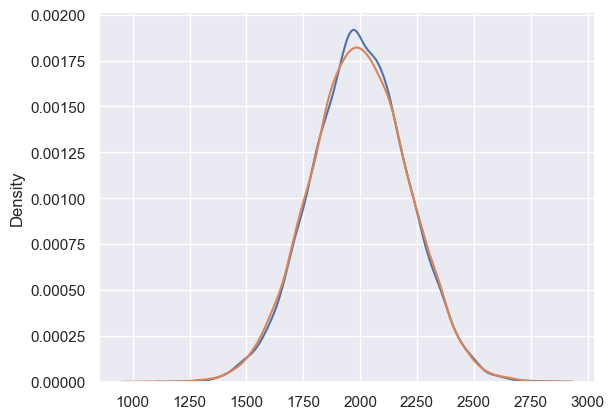

In [19]:
import random 

def walknp(n: int):
    res = np.random.choice([-3, -1, 0, 2, 3],n).sum()
    return res

%timeit walk(10000)
%timeit walknp(10000)

def countwalknp(m: int):
    count = []
    for _ in range(m):
        count.append(walknp(10000)) 
    return count  

def countwalk(m: int):
    count = []
    for _ in range(m):
        count.append(walk(10000)) 
    return count  

countwalk(10000)
countwalknp(10000)
sns.kdeplot(countwalk(10000))
sns.kdeplot(countwalknp(10000))
plt.show()

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [20]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


1.1269174527659223

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [21]:
# Numba
import numba
from numba import jit
strange_conv_nb = numba.jit(strange_conv)
a = np.random.random((10000, 10000))
%timeit strange_conv(a)
%timeit strange_conv_nb

21 s ± 381 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
25.5 ns ± 0.658 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
